# Classification methods

Scikit-FDAのExampleのひとつである，Classification methodsを実行した．

学べること
* 以下の4つの手法を実行する方法がわかった．
    * MaximumDepthClassifier
    * KNeighborsClassifier
    * NearestCentroid
    * QuadraticDiscriminantAnalysis

学べないこと
* 具体的な各種法の意味
* 実データで適用する方法
    * 各関数に渡すための学習データの形は`FDataGrid`という形だが，実際にどうやって定義するかは別途勉強が必要．

https://fda.readthedocs.io/en/stable/auto_examples/plot_classification_methods.html#sphx-glr-auto-examples-plot-classification-methods-py


In [1]:
# import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from skfda.datasets import fetch_growth
from skfda.exploratory.depth import ModifiedBandDepth
from skfda.exploratory.stats.covariance import ParametricGaussianCovariance
from skfda.misc.covariances import Gaussian
# 比較する4つの手法
from skfda.ml.classification import (
    KNeighborsClassifier,
    MaximumDepthClassifier,
    NearestCentroid,
    QuadraticDiscriminantAnalysis
)

In [2]:
X, y = fetch_growth(return_X_y=True, as_frame=True)

In [3]:
X = X.iloc[:, 0].values
categories = y.values.categories
y = y.values.codes

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    stratify=y,
    random_state=0,
)

/var/folders/h9/fp828wv157s5ldtt6zzd3t040000gn/T/ipykernel_2707/3522325190.py:3: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  group_names=categories).show()


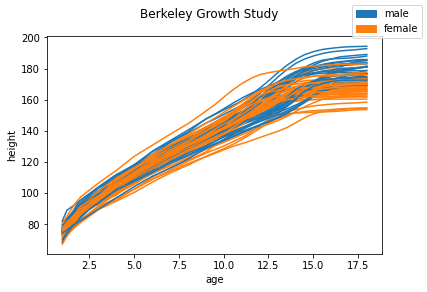

In [5]:
# plot samples grouped by sex
X_train.plot(group=y_train, 
             group_names=categories).show()

/var/folders/h9/fp828wv157s5ldtt6zzd3t040000gn/T/ipykernel_2707/2737029548.py:1: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  X_test.plot().show()


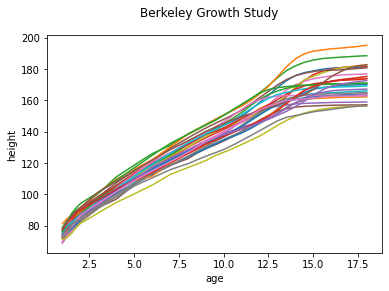

In [6]:
X_test.plot().show()

4つの手法を比較する

* `MaximumDepthClassifier`
* `KNeighborsClassifier`
* `NearestCentroid`
* `QuadraticDiscriminantAnalysis`

In [7]:
# Maximum Depth Classifier
depth = MaximumDepthClassifier(depth_method=ModifiedBandDepth())
depth.fit(X_train, y_train)
depth_pred = depth.predict(X_test)
print(depth_pred)
print(depth.score(X_test, y_test))

[0 1 0 0 1 1 0 1 0 1 1 0 0 0 1 0 1 1 1 1 1 0 0 0 1 0 1 1]
0.8214285714285714


In [8]:
# KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
print(knn_pred)
print(knn.score(X_test, y_test))

[0 1 0 0 1 1 0 1 0 1 0 0 1 1 0 0 1 1 1 1 1 0 1 0 0 0 1 1]
0.9642857142857143


In [9]:
# Nearest Centroid
centroid = NearestCentroid()
centroid.fit(X_train, y_train)
centroid_pred = centroid.predict(X_test)
print(centroid_pred)
print(centroid.score(X_test, y_test))

[0 1 0 0 1 1 0 1 0 1 1 1 1 0 1 0 1 1 1 1 1 0 1 0 1 0 1 1]
0.8571428571428571


In [10]:
# QuadraticDiscriminantAnalysis
qda = QuadraticDiscriminantAnalysis(
    ParametricGaussianCovariance(
        Gaussian(variance=6, length_scale=1),
    ),
    regularizer=0.05,
)
qda.fit(X_train, y_train)
qda_pred = qda.predict(X_test)
print(qda_pred)
print(qda.score(X_test, y_test))

[0 1 0 0 1 1 0 1 0 1 0 0 1 1 1 0 1 1 1 1 1 0 1 0 1 0 1 1]
0.9642857142857143


In [11]:
# Summarize accuuracies
acc_df = pd.DataFrame({
    "Classification methods": 
        [ 
            "Maximum Depth Classifier",
            "K-Nearest-Neighbors",
            "Nearest Centroid Classifier",
            "Functional QDA",
        ],
    "Accuracy":
        [
            "{0:2.2%}".format(depth.score(X_test, y_test)),
            "{0:2.2%}".format(knn.score(X_test, y_test)),
            "{0:2.2%}".format(centroid.score(X_test, y_test)),
            "{0:2.2%}".format(qda.score(X_test, y_test)),
        ],
})
acc_df

,Classification methods,Accuracy
0,Maximum Depth Classifier,82.14%
1,K-Nearest-Neighbors,96.43%
2,Nearest Centroid Classifier,85.71%
3,Functional QDA,96.43%


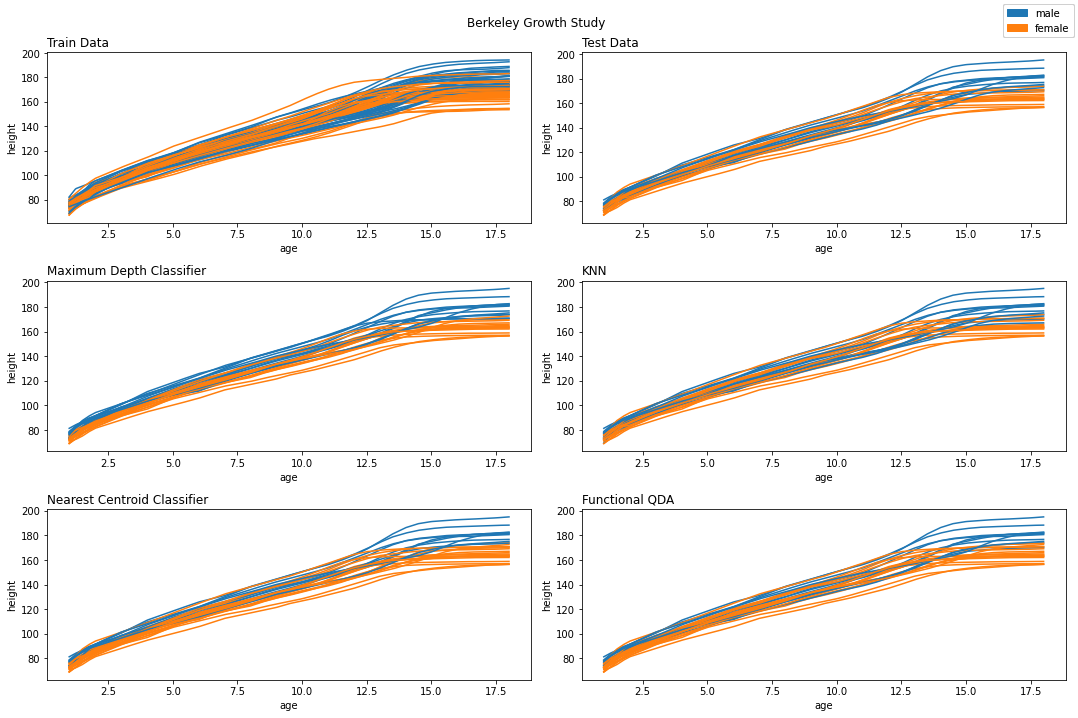

In [12]:
# Plot results
fig, axes = plt.subplots(3, 2, figsize=(15, 10))
X_train.plot(group=y_train, group_names=categories, axes=axes[0][0])
axes[0][0].set_title("Train Data", loc="left")
X_test.plot(group=y_test, group_names=categories, axes=axes[0][1])
axes[0][1].set_title("Test Data", loc="left")

X_test.plot(group=depth_pred, group_names=categories, axes=axes[1][0])
axes[1][0].set_title("Maximum Depth Classifier", loc="left")

X_test.plot(group=knn_pred, group_names=categories, axes=axes[1][1])
axes[1][1].set_title("KNN", loc="left")

X_test.plot(group=centroid_pred, group_names=categories, axes=axes[2][0])
axes[2][0].set_title("Nearest Centroid Classifier", loc="left")

X_test.plot(group=qda_pred, group_names=categories, axes=axes[2][1])
axes[2][1].set_title("Functional QDA", loc="left")

plt.tight_layout()